# Chicago COVID mobility

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Features

In [37]:
df_features_census = pd.read_csv('./data/census_processed.csv')
df_features_census["geo_12"] = df_features_census["GEO_ID"].map(lambda x: str(x)[-12:])
df_features_census.drop(["GEO_ID"], axis=1, inplace=True)
df_features_census['geo_12'] = df_features_census['geo_12'].astype('int64')

In [35]:
df_features_places = pd.read_csv('./data/places_count_by_census_block.csv', dtype={'geo_12': 'str'})
df_features_places['geo_12'] = df_features_places['geo_12'].astype('int64')

In [39]:
df_features = df_features_places.merge(df_features_census, on='geo_12')
df_features.head()

,geo_12,automotive_repair_and_maintenance,child_day_care_services,elementary_and_secondary_schools,grocery_stores,health_and_personal_care_stores,"museums,_historical_sites,_and_similar_institutions",offices_of_physicians,other_amusement_and_recreation_industries,religious_organizations,...,Percent_HS,Percent_SomeCollege,Percent_Bach,Percent_Grad,Percent_No_vehicals,Percent_Received_SNAP,Percent_Men_Usually_Fulltime_Employed,Percent_Women_Usually_Fulltime_Employed,Percent_No_Internet_Access,Percent_Computing_Device
0,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.168511,0.255138,0.289598,0.179260,0.344589,0.186960,0.885906,0.382653,0.217742,0.782258
1,170310101002,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,1.0,...,0.168511,0.255138,0.289598,0.179260,0.344589,0.186960,0.507064,0.452071,0.330517,0.829989
2,170310101003,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,...,0.168511,0.255138,0.289598,0.179260,0.344589,0.186960,0.765318,0.663338,0.074041,0.950045
3,170310102011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.246110,0.246314,0.193898,0.114251,0.140014,0.316592,0.559184,0.437107,0.105030,0.921598
4,170310102012,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.246110,0.246314,0.193898,0.114251,0.140014,0.316592,0.495495,0.320800,0.202247,0.822868


In [6]:
census_gdf = gpd.read_file("https://data.cityofchicago.org/resource/bt9m-d2mf.geojson?$limit=9999999")
census_gdf["geo_12"] = census_gdf["geoid10"].map(lambda x: int(str(x)[:12]))

In [14]:
census_gdf["geo_12"] = census_gdf["geoid10"].map(lambda x: int(str(x)[:12]))

In [53]:
crs = 'epsg:4326'
merged_gdf_features = gpd.GeoDataFrame(df_features.merge(census_gdf, on="geo_12"), crs=crs)

(-87.95586409918897,
 -87.50307989992211,
 41.625343549653124,
 42.042077450231275)

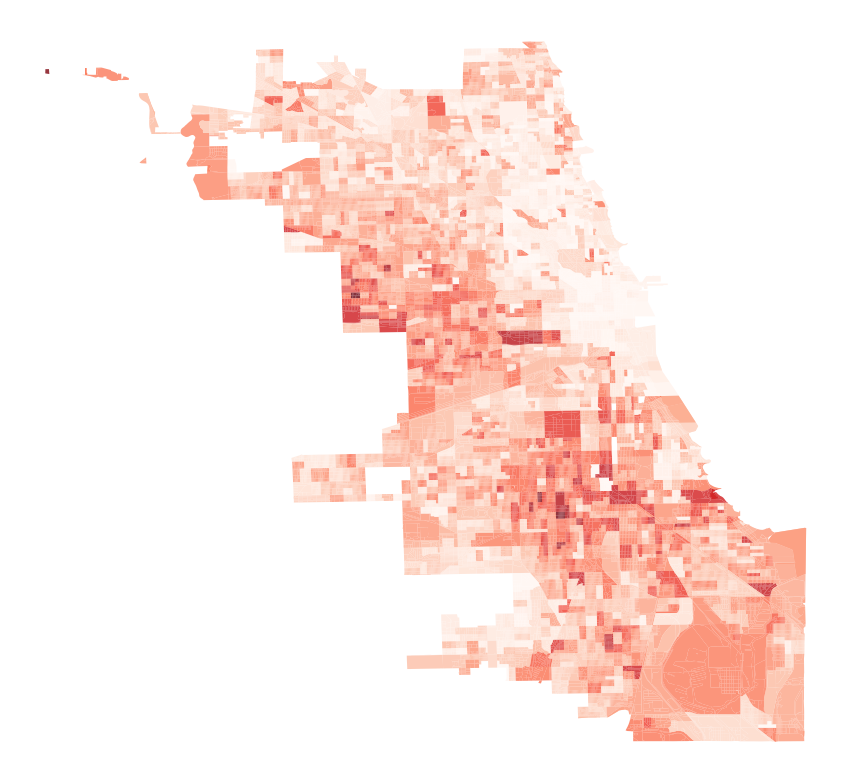

In [59]:
fig, ax = plt.subplots(figsize=(15,15))
merged_gdf_features.plot(column='Percent_No_Internet_Access',ax =ax, alpha=0.8, cmap='Reds')
ax.axis('off')

### Targets

In [60]:
df_targets_diff = pd.read_csv('./data/COVID_mobility_targets_adjusted.csv', dtype={'geo_12': 'int64'})
df_targets_diff.describe()

,geo_12,Week,fraction_of_devices_home_adj,fraction_of_devices_work_adj,fraction_time_away_all_adj,fraction_time_away_leave_adj
count,5.806200e+04,58062.000000,58062.000000,58062.000000,58062.000000,58062.000000
mean,1.707888e+11,15.500155,-0.117154,0.071030,0.014981,-0.021604
std,5.958312e+08,1.707820,0.108885,0.058293,0.053169,0.062539
min,1.700100e+11,13.000000,-0.586477,-0.318014,-0.606889,-0.623379
25%,1.703180e+11,14.000000,-0.186630,0.031927,-0.010526,-0.050053
50%,1.704384e+11,16.000000,-0.113398,0.067626,0.018535,-0.014998
75%,1.711796e+11,17.000000,-0.045009,0.107150,0.046061,0.015624
max,1.720303e+11,18.000000,0.485828,0.379182,0.316091,0.316894


In [22]:
week_1 = df_targets_diff[df_targets_diff['Week']==13]
week_5 = df_targets_diff[df_targets_diff['Week']==16]
week_9 = df_targets_diff[df_targets_diff['Week']==18]

In [84]:
merged_all = gpd.GeoDataFrame(df_targets_diff.merge(census_gdf, on="geo_12"), crs=crs)

In [23]:
crs = 'epsg:4326'

merged_gdf_targets_week_1 = gpd.GeoDataFrame(week_1.merge(census_gdf, on="geo_12"), crs=crs)
merged_gdf_targets_week_5 = gpd.GeoDataFrame(week_5.merge(census_gdf, on="geo_12"), crs=crs)
merged_gdf_targets_week_9 = gpd.GeoDataFrame(week_9.merge(census_gdf, on="geo_12"), crs=crs)

In [71]:
dissolved = merged_gdf_targets_week_1.dissolve(by='geo_12')

In [72]:
dissolved.describe()

,Week,fraction_of_devices_home_adj,fraction_of_devices_work_adj,fraction_time_away_all_adj,fraction_time_away_leave_adj
count,2185.0,2185.000000,2185.000000,2185.000000,2185.000000
mean,13.0,-0.121090,0.052001,-0.002632,-0.055439
std,0.0,0.108744,0.050321,0.058443,0.075283
min,13.0,-0.452575,-0.205340,-0.537670,-0.562922
25%,13.0,-0.191220,0.019241,-0.031128,-0.091444
50%,13.0,-0.123544,0.052646,0.003153,-0.050664
75%,13.0,-0.053402,0.084168,0.033847,-0.006730
max,13.0,0.441500,0.232593,0.173484,0.193813


Text(0, 0.5, 'count of census tracts')

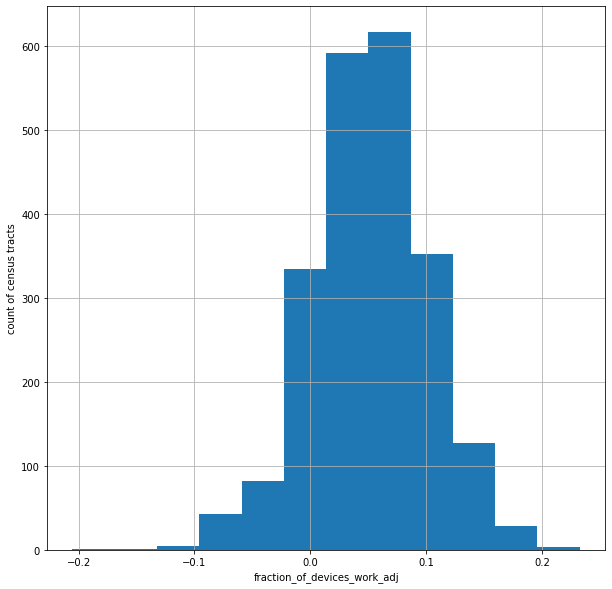

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
dissolved['fraction_of_devices_work_adj'].hist(bins=12)
plt.xlabel('fraction_of_devices_work_adj')
plt.ylabel('count of census tracts')

In [88]:
color_map = plt.cm.get_cmap('Blues')
reversed_color_map = color_map.reversed()

(-87.95586409918897,
 -87.50307989992211,
 41.625343549653124,
 42.042077450231275)

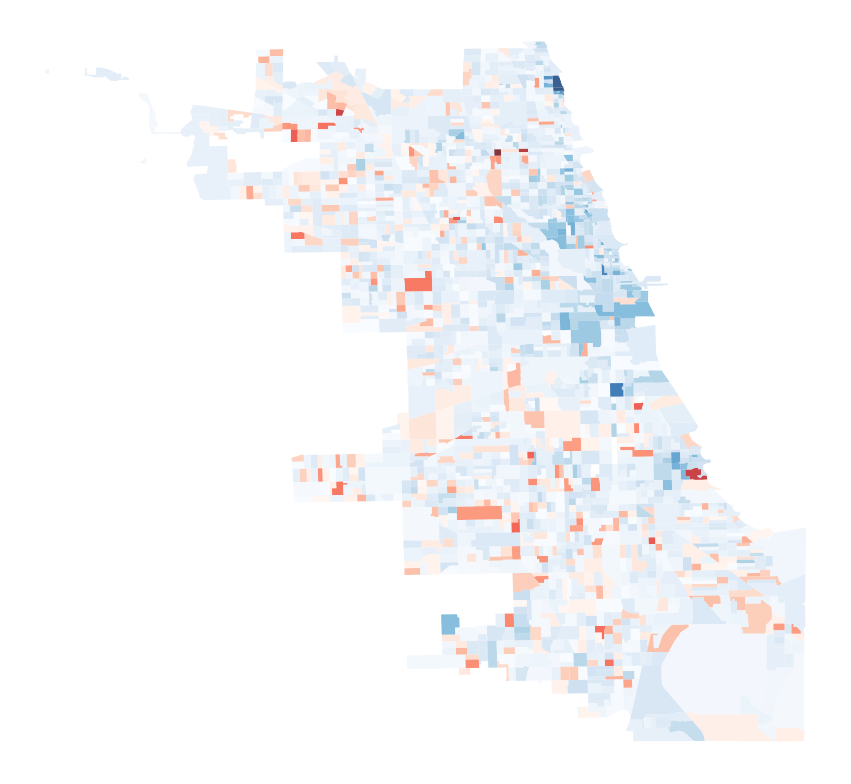

In [95]:
pos = dissolved[dissolved['fraction_time_away_leave_adj']>0]
neg = dissolved[dissolved['fraction_time_away_leave_adj']<0]
fig, ax = plt.subplots(figsize=(15,15))
pos.plot(column='fraction_time_away_leave_adj',ax =ax, alpha=0.8, cmap= 'Reds')
neg.plot(column='fraction_time_away_leave_adj',ax =ax, alpha=0.8, cmap=reversed_color_map)
ax.axis('off')

In [67]:
pos

,geo_12,Week,fraction_of_devices_home_adj,fraction_of_devices_work_adj,fraction_time_away_all_adj,fraction_time_away_leave_adj,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry
4,170310101002,13,-0.174557,0.038809,0.017442,-0.033646,17,Block 2002,2002,0101002002,170310101002002,010100,031,"MULTIPOLYGON (((-87.67231 42.02285, -87.67231 ..."
5,170310101002,13,-0.174557,0.038809,0.017442,-0.033646,17,Block 2007,2007,0101002007,170310101002007,010100,031,"MULTIPOLYGON (((-87.67249 42.02118, -87.67284 ..."
6,170310101002,13,-0.174557,0.038809,0.017442,-0.033646,17,Block 2012,2012,0101002012,170310101002012,010100,031,"MULTIPOLYGON (((-87.67009 42.02115, -87.67012 ..."
7,170310101002,13,-0.174557,0.038809,0.017442,-0.033646,17,Block 2000,2000,0101002000,170310101002000,010100,031,"MULTIPOLYGON (((-87.67188 42.02299, -87.67007 ..."
8,170310101002,13,-0.174557,0.038809,0.017442,-0.033646,17,Block 2003,2003,0101002003,170310101002003,010100,031,"MULTIPOLYGON (((-87.67010 42.02161, -87.67018 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46156,170318439001,13,-0.069449,0.051230,0.000801,-0.028198,17,Block 1002,1002,8439001002,170318439001002,843900,031,"MULTIPOLYGON (((-87.57341 41.77976, -87.57348 ..."
46157,170318439001,13,-0.069449,0.051230,0.000801,-0.028198,17,Block 1018,1018,8439001018,170318439001018,843900,031,"MULTIPOLYGON (((-87.59099 41.77876, -87.59107 ..."
46158,170318439001,13,-0.069449,0.051230,0.000801,-0.028198,17,Block 1007,1007,8439001007,170318439001007,843900,031,"MULTIPOLYGON (((-87.57429 41.77554, -87.57373 ..."
46159,170318439001,13,-0.069449,0.051230,0.000801,-0.028198,17,Block 1006,1006,8439001006,170318439001006,843900,031,"MULTIPOLYGON (((-87.57370 41.77899, -87.57343 ..."


In [37]:
min(week_1['fraction_of_devices_work_adj'])

-0.2255293648150791

In [44]:
df = df_features.merge(df_targets, on='geo_12')
df.head()

,geo_12,automotive_repair_and_maintenance,child_day_care_services,elementary_and_secondary_schools,grocery_stores,health_and_personal_care_stores,"museums,_historical_sites,_and_similar_institutions",offices_of_physicians,other_amusement_and_recreation_industries,religious_organizations,...,Percent_Men_Usually_Fulltime_Employed,Percent_Women_Usually_Fulltime_Employed,Percent_No_Internet_Access,Percent_Computing_Device,Unnamed: 0,Week,fraction_of_devices_home,fraction_of_devices_work,fraction_time_away_all,fraction_time_away_leave
0,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.885906,0.382653,0.217742,0.782258,4426,12,0.291667,0.183333,0.324884,0.465625
1,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.885906,0.382653,0.217742,0.782258,4427,13,0.316232,0.188825,0.307667,0.478970
2,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.885906,0.382653,0.217742,0.782258,4428,14,0.482188,0.172577,0.139410,0.287164
3,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.885906,0.382653,0.217742,0.782258,4429,15,0.558156,0.199220,0.133374,0.278976
4,170310101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.885906,0.382653,0.217742,0.782258,4430,16,0.619395,0.210746,0.044708,0.157531


### Targets adjusted

In [ ]:
df_targets_adj = pd.read_csv('./COVID_mobility_targets_adjusted.csv', dtype={'geo_12': 'str'})
df_targets_adj.info()

In [ ]:
df_diff = df_features.merge(df_targets_adj, on='geo_12')
df_diff.columns